# **Infracciones**
Importar Dataset con reportes de infracciones en Nashville. Limpieza de datos NaN y columnas innecesarias. Cambio de nombre a columnas para facilidad y manejo del dataset.

In [ ]:
import requests
import zipfile
import io
import pandas as pd

url = "https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_tn_nashville_2020_04_01.csv.zip"

response = requests.get(url)

if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        zip_ref.printdir()

        zip_ref.extractall()

        csv_filename = zip_ref.namelist()[0]

        df = pd.read_csv(csv_filename)

        print(df.head())

else:
    print(f"Error al descargar el archivo. Código de estado: {response.status_code}")

File Name                                             Modified             Size
tn_nashville_2020_04_01.csv                    2020-04-01 08:01:22   1041150419


<ipython-input-19-6db74bb1c897>:18: DtypeWarning: Columns (6,8,15,16,17,22,23,24,25,29,30,31,32,33,35,36,37,38,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_filename)


  raw_row_number        date      time  \
0         232947  2010-10-10       NaN   
1         237161  2010-10-10  10:00:00   
2         232902  2010-10-10  10:00:00   
3         233219  2010-10-10  22:00:00   
4         232780  2010-10-10  01:00:00   

                                            location        lat        lng  \
0  DOMINICAN DR & ROSA L PARKS BLVD, NASHVILLE, T...  36.187925 -86.798519   
1            1122 LEBANON PIKE, NASHVILLE, TN, 37210  36.155521 -86.735902   
2                       898 DAVIDSON DR, , TN, 37205  36.117420 -86.895593   
3  MURFREESBORO PIKE & NASHBORO BLVD, ANTIOCH, TN...  36.086799 -86.648581   
4                      BUCHANAN ST, NORTH, TN, 37208  36.180038 -86.809109   

  precinct  reporting_area   zone  subject_age  ...  \
0      6.0          4403.0  611.0         27.0  ...   
1      5.0          9035.0  513.0         18.0  ...   
2      1.0          5005.0  121.0         52.0  ...   
3      3.0          8891.0  325.0         25.0  ...   
4  

In [ ]:
df = df.dropna()

columnas_a_eliminar = ['date','raw_row_number', 'type','officer_id_hash','lat', 'location','lng', 'precinct', 'reporting_area', 'zone', 'contraband_found', 'contraband_drugs', 'contraband_weapons', 'frisk_performed', 'search_conducted', 'search_person', 'search_vehicle', 'search_basis', 'reason_for_stop', 'vehicle_registration_state', 'notes', 'raw_verbal_warning_issued', 'raw_written_warning_issued', 'raw_traffic_citation_issued', 'raw_misd_state_citation_issued', 'raw_suspect_ethnicity', 'raw_driver_searched', 'raw_passenger_searched', 'raw_search_consent', 'raw_search_arrest', 'raw_search_warrant', 'raw_search_inventory', 'raw_search_plain_view']

df.drop(columnas_a_eliminar, axis=1, inplace=True)

df = df.rename(columns={'subject_age': 'age'})
df = df.rename(columns={'subject_race': 'race'})
df = df.rename(columns={'subject_sex': 'sex'})

print(df.head())

<ipython-input-20-d1b61a91721b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columnas_a_eliminar, axis=1, inplace=True)


          time   age   race   sex                    violation arrest_made  \
198   00:20:00  27.0  white  male     moving traffic violation       False   
733   22:30:00  23.0  white  male     moving traffic violation       False   
1561  18:43:00  20.0  white  male  vehicle equipment violation       False   
1742  20:56:00  35.0  black  male  vehicle equipment violation       False   
2195  00:05:00  25.0  black  male     moving traffic violation       False   

     citation_issued warning_issued   outcome  
198             True          False  citation  
733             True           True  citation  
1561            True           True  citation  
1742            True           True  citation  
2195            True          False  citation  


Breve resumen de las variables.

In [ ]:
moda_raza = df['race'].mode()[0]
moda_edad = df['age'].mode()[0]
moda_genero = df['sex'].mode()[0]

print("Moda de raza:", moda_raza)
print("Moda de edad:", moda_edad)
print("Moda de genero:", moda_genero)

print(df.describe())
print(df['race'].value_counts())
print(df['sex'].value_counts())
print(df['violation'].value_counts())
print(df['outcome'].value_counts())

Moda de raza: black
Moda de edad: 22.0
Moda de genero: male
                age
count  18395.000000
mean      30.817124
std       11.167478
min       13.000000
25%       22.000000
50%       28.000000
75%       37.000000
max       99.000000
race
black                     10653
white                      6079
hispanic                   1464
asian/pacific islander       97
unknown                      79
other                        23
Name: count, dtype: int64
sex
male      14237
female     4158
Name: count, dtype: int64
violation
moving traffic violation       7982
vehicle equipment violation    5435
safety violation               1561
registration                   1417
investigative stop             1352
seatbelt violation              596
parking violation                42
child restraint                  10
Name: count, dtype: int64
outcome
citation    7554
arrest      6364
warning     4477
Name: count, dtype: int64


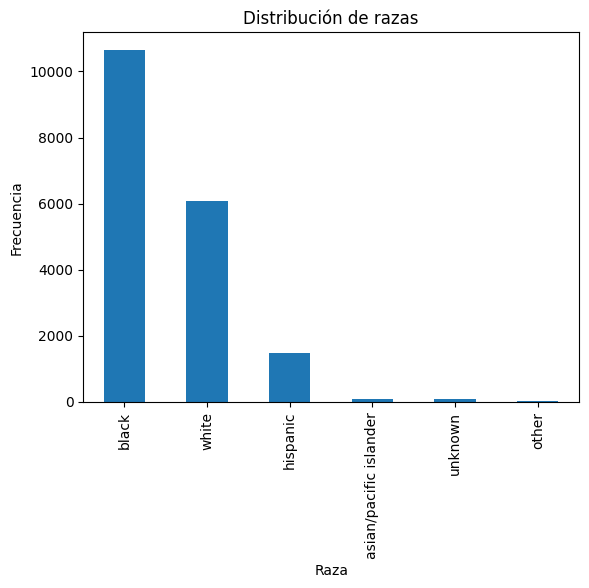

In [ ]:
import matplotlib.pyplot as plt

df['race'].value_counts().plot(kind='bar')
plt.title('Distribución de razas')
plt.xlabel('Raza')
plt.ylabel('Frecuencia')
plt.show()

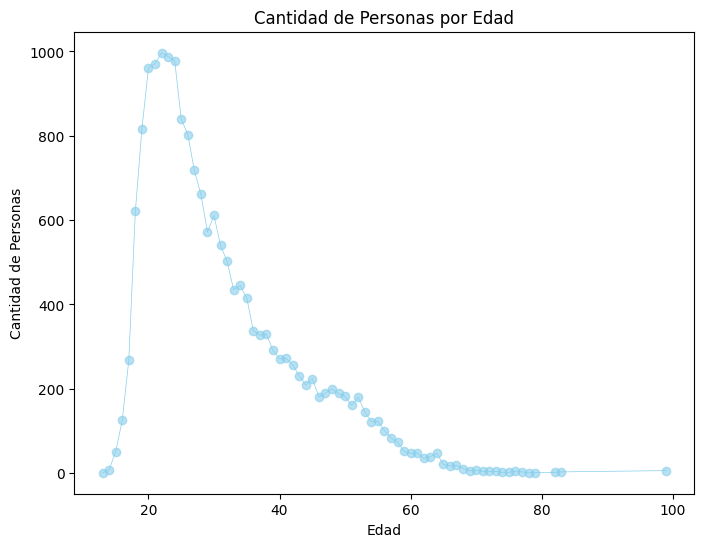

In [ ]:
age_counts = df['age'].value_counts().sort_index()  # Contamos las edades y ordenamos por la edad

plt.figure(figsize=(8, 6))
plt.scatter(age_counts.index, age_counts.values, color='skyblue', edgecolors='skyblue', alpha=0.6)

plt.plot(age_counts.index, age_counts.values, color='skyblue', linestyle='-', linewidth=0.5)

plt.title('Cantidad de Personas por Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Personas')

plt.show()

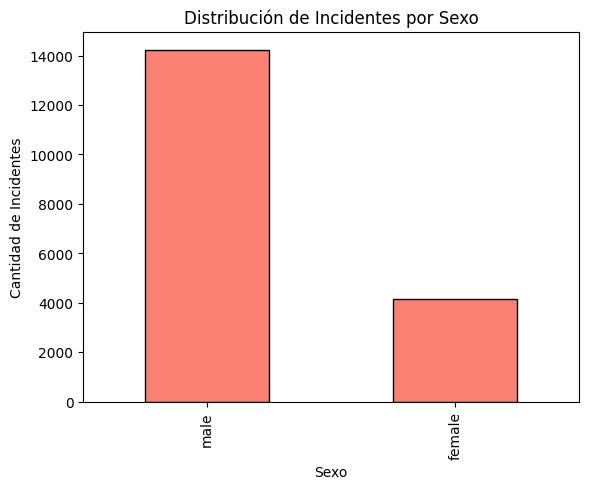

In [ ]:
df['sex'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribución de Incidentes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Incidentes')
plt.show()

outcome                 arrest  citation  warning
race                                             
asian/pacific islander      41        30       26
black                     3414      4461     2778
hispanic                   531       759      174
other                        8        13        2
unknown                     18        26       35
white                     2352      2265     1462
V de Cramer: 0.9277765367969448


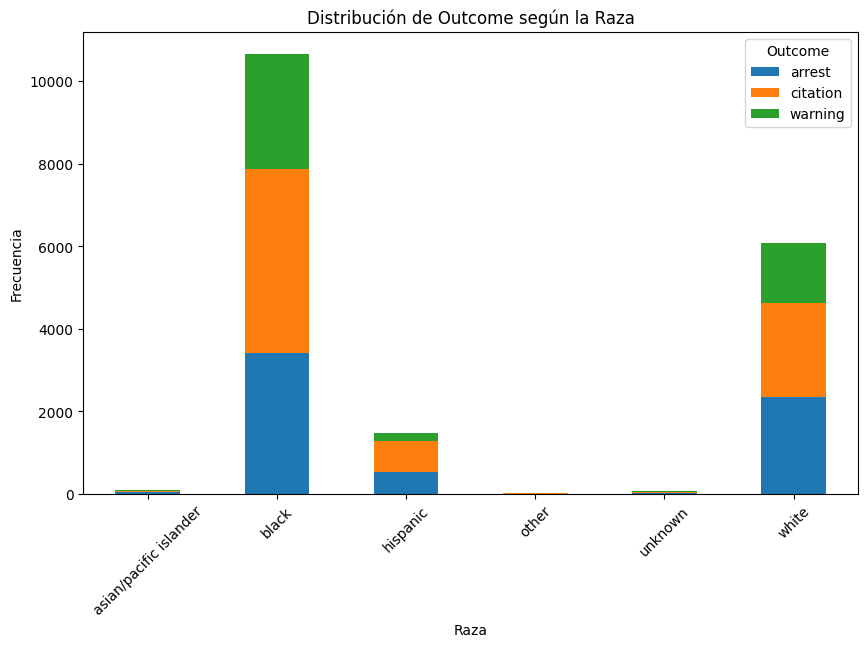

In [ ]:
contingencia = pd.crosstab(df['race'], df['outcome'])
print(contingencia)

#CALCULO CRAMER
chi2 = (((contingencia - contingencia.mean())**2) / contingencia.mean()).sum().sum()
n = contingencia.sum().sum()
min_dim = min(contingencia.shape) - 1

v_cramer = np.sqrt(chi2 / (n * min_dim))
print(f"V de Cramer: {v_cramer}")

contingencia.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Outcome según la Raza')
plt.xlabel('Raza')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Outcome')
plt.show()


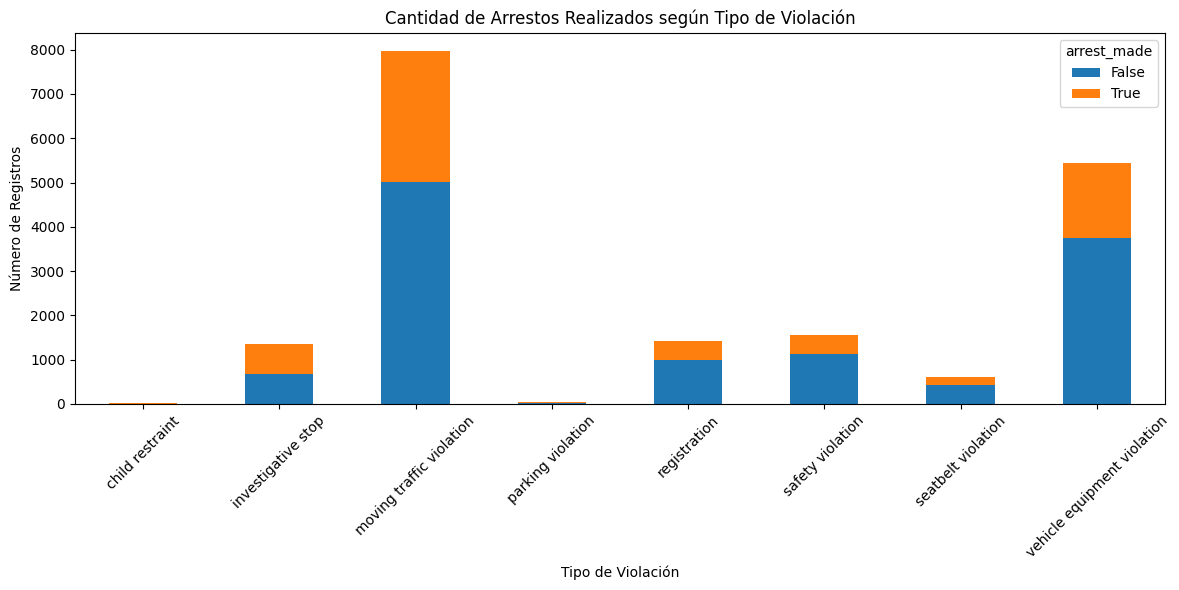

In [ ]:
violation_arrest_counts = df.groupby(['violation', 'arrest_made']).size().unstack(fill_value=0)

violation_arrest_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])

plt.title('Cantidad de Arrestos Realizados según Tipo de Violación')
plt.xlabel('Tipo de Violación')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Nota: Una infracción de equipamiento del vehículo es una infracción de tráfico que se produce cuando un vehículo no cumple con los estándares requeridos de equipamiento y mantenimiento.

<ipython-input-28-14e5a50e85b0>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


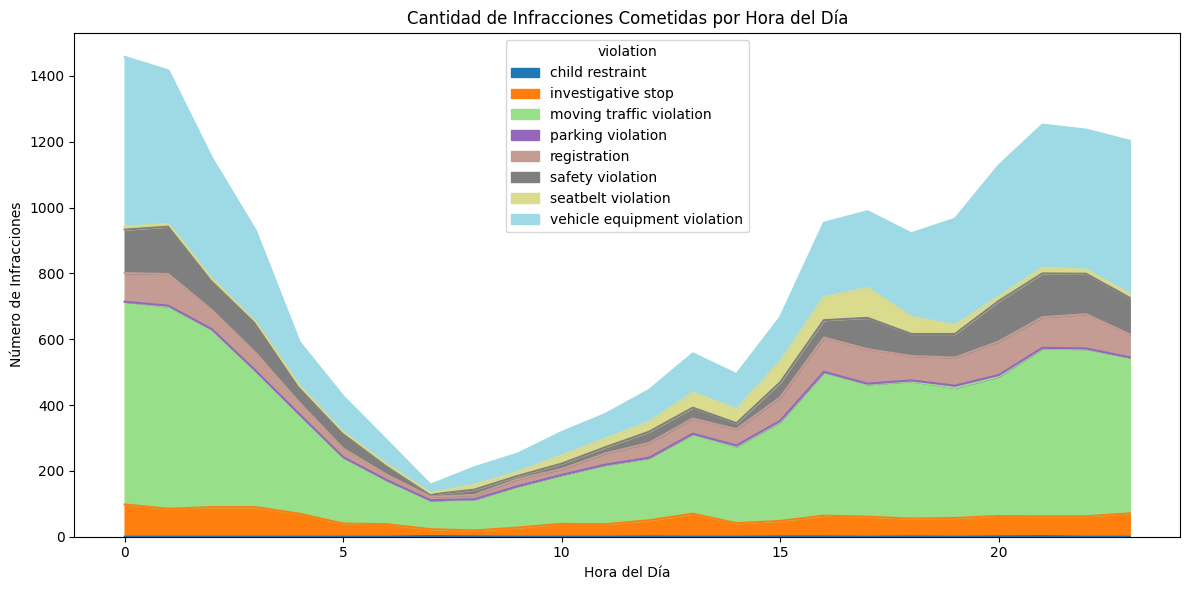

In [ ]:
df['time'] = pd.to_datetime(df['time'])

df['hour'] = df['time'].dt.hour

violation_by_hour = df.groupby(['hour', 'violation']).size().unstack(fill_value=0)

violation_by_hour.plot(kind='area', figsize=(12, 6), stacked=True, colormap='tab20')

plt.title('Cantidad de Infracciones Cometidas por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Infracciones')

plt.tight_layout()
plt.show()

In [ ]:
outcome_vs_sex = pd.crosstab(df['sex'], df['outcome'], normalize='index')

print("Proporción de outcome por género:\n", outcome_vs_sex)

Proporción de outcome por género:
 outcome    arrest  citation   warning
sex                                  
female   0.386243   0.36075  0.253006
male     0.334200   0.42523  0.240570


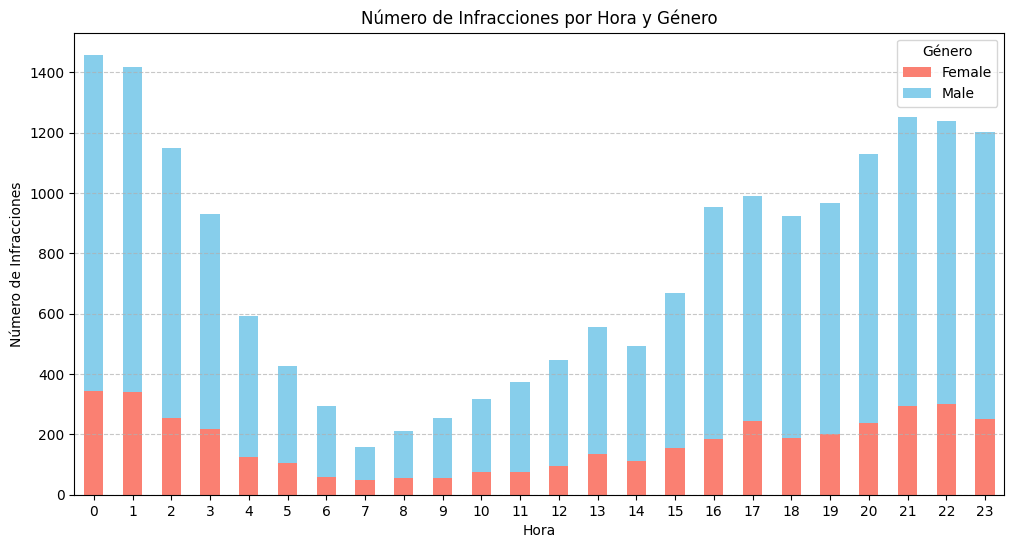

In [ ]:
infracciones_por_hora_genero = df.groupby(['hour', 'sex']).size().unstack(fill_value=0)

infracciones_por_hora_genero.plot(kind='bar', stacked=True, figsize=(12, 6), color=['salmon', 'skyblue'])
plt.title("Número de Infracciones por Hora y Género")
plt.xlabel("Hora")
plt.ylabel("Número de Infracciones")
plt.xticks(rotation=0)
plt.legend(title="Género", labels=["Female", "Male"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
